# Potential Big Data Project
### Author: William Olichney

### Background of AidData:

        I am a "Data Research Associate" for AidData's "Loan Performance Team". AidData is a research lab located at William & Mary, but is absolutely famous when it comes to international development research. While there are some companies and parties interested in all angles of our data, but most are interested in our flagship "Tracking Underreported Financial Flows", or TUFF, because we focus on China. 

### The Loan Performance Team

        So, TUFF focuses on China, big whoop. NO ONE's DATABASE is better than ours. We have better tracking on China's loans, grants, scholarships, debt reschedulings, debt forgivnesses, foreign direct investment, and technical assistance. Basically, anytime money comes from China's government (which, in a country with a centralized government, captures the big picture), we captured data on it.

        Cool, a buncha data, big whoop. This is where my team comes in, the Loan Performance team. In our database already, we have every loan agreement between China and other countries. 
        
            "China and Cuba have agreed on a loan for 1$ billion dollars on May 2020, here are the loan terms..."
            
    The Loan Performance team goes the extra step. We look into financial reports of what individual disbursements, interest payments, principal payments, etc. Why do we do this? Countries have a hard time paying the loan back. What happens when you can't pay back your mortgage to the bank? They may take your house. What can a soverign country do to another soverign country if they can't pay back? They can't come force the money back, but they can threaten to not give out any other loans, which tends to be good enough motivation. So, they have to negotiate, using debt reschedulings.
   
        Basically, countries who can't pay their loan, can make smaller payments over a longer period of time. However! this may mean they have to may almost DOUBLE what they originally had to pay. This has enourmous implications on neocolonialism, China's role in the world, international development, etc.


### Why should you care? 
 
### 1. J.P Morgan
- JP Morgan handles international financing between the US and pretty much every other country. They're the reason international transactions run on the dollar.
  
- I've had JP Morgan analysts try to ask me the inside information on this work. I think it's because when the flows between China and the recipient country are in US dollar, they will be in on that transaction.

  
- JP Morgan has their own China team. They find that understanding China in the same way we do, which may sound like humanities/academic mumbo jumbo to y'all, they find important when conducting financial business services between US and China

### 2. 'Syndicated' Loans, multiple banks financing a loan
- Even if China is just a partial funder of a loan, we still track everything
- Many private banks can be a part of the loan; example: Indonesia's richest women (top 1000 billionaire in the world), is in on loan that China is also in on. When a loan needs to be rescehduled, its a negotating FIGHT between the co-financiers. Which co-financier will get the better deal after the negotiating? Lots of private banks struggle against China's negotiations. So, if you learn AidData real good, you could tell these private banks how to better negotiate (I'm not smart enough to know that answer).

### 3. National Security / Transparency

    The reason we even get funding is that the US government wants to know this information about Chinese loans. I think it's because the US government wants to make the arguement that we are 'better' or more 'moral' than China. For this context, that maybe China is not being 'moral' in its financing methods. So, as far as this perspective is concerned, we are performing an audit on offical Chinese banks. I do believe in transparency, and that information should not be buried in a boring government document that will rot in an archive. So, we are also supporting transparency in international finance.

### 4. You want a job in banking? Be an AI specialist?
    This will truly make you able to "leverage AI" in a way few in this world can
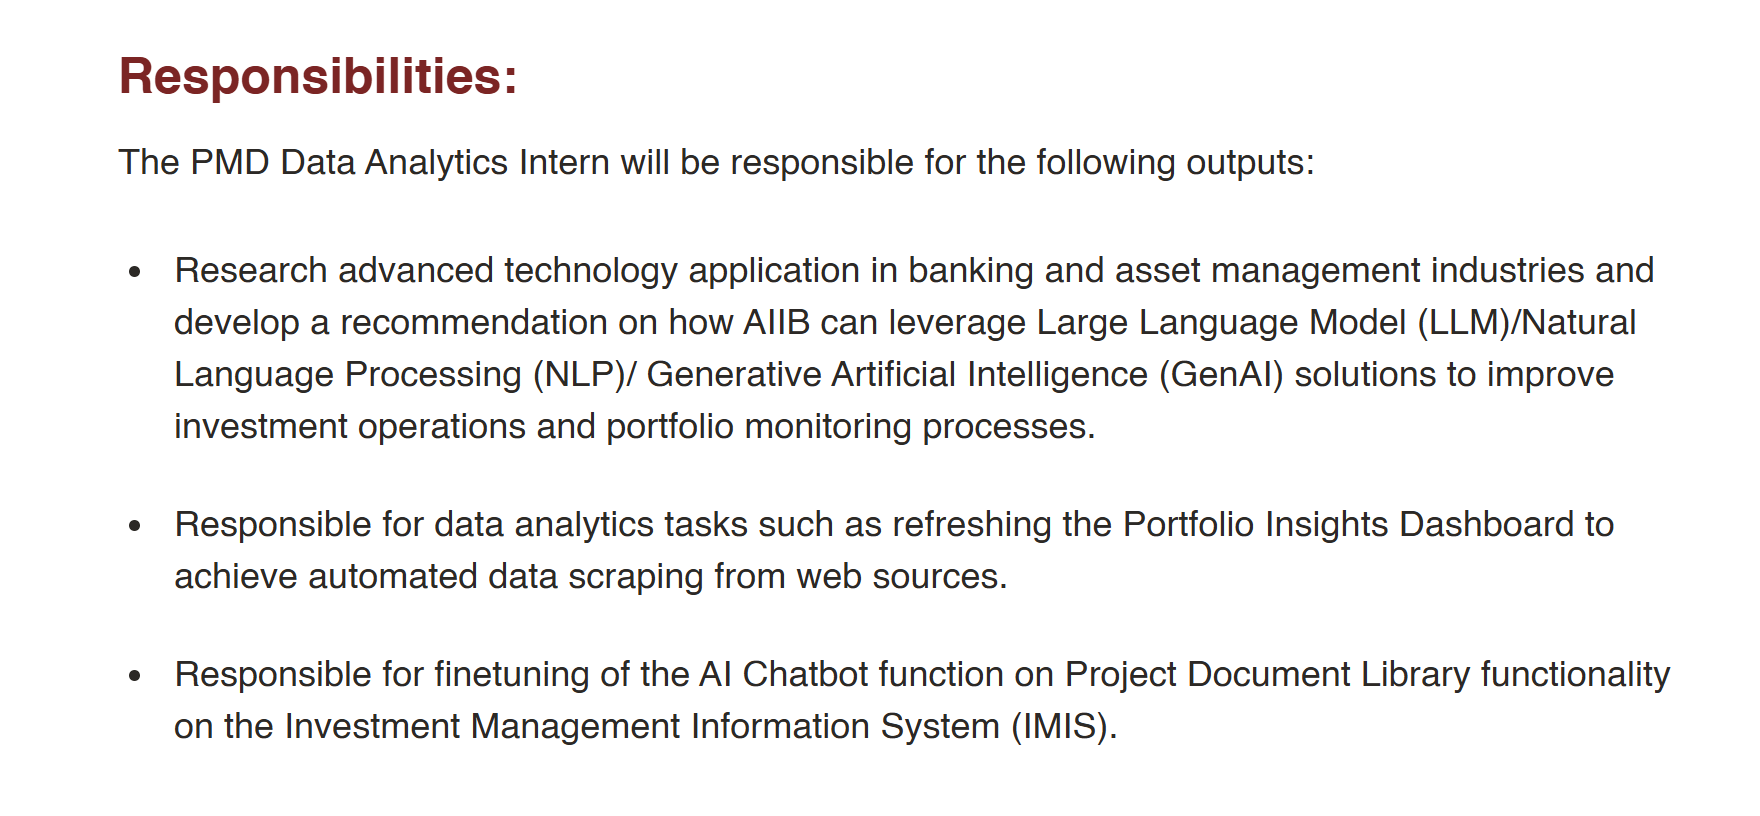

# How does this relate to Big Data?

    I would love to better automate data collection. I have spent 200 hours reading pdfs looking for relevant data.

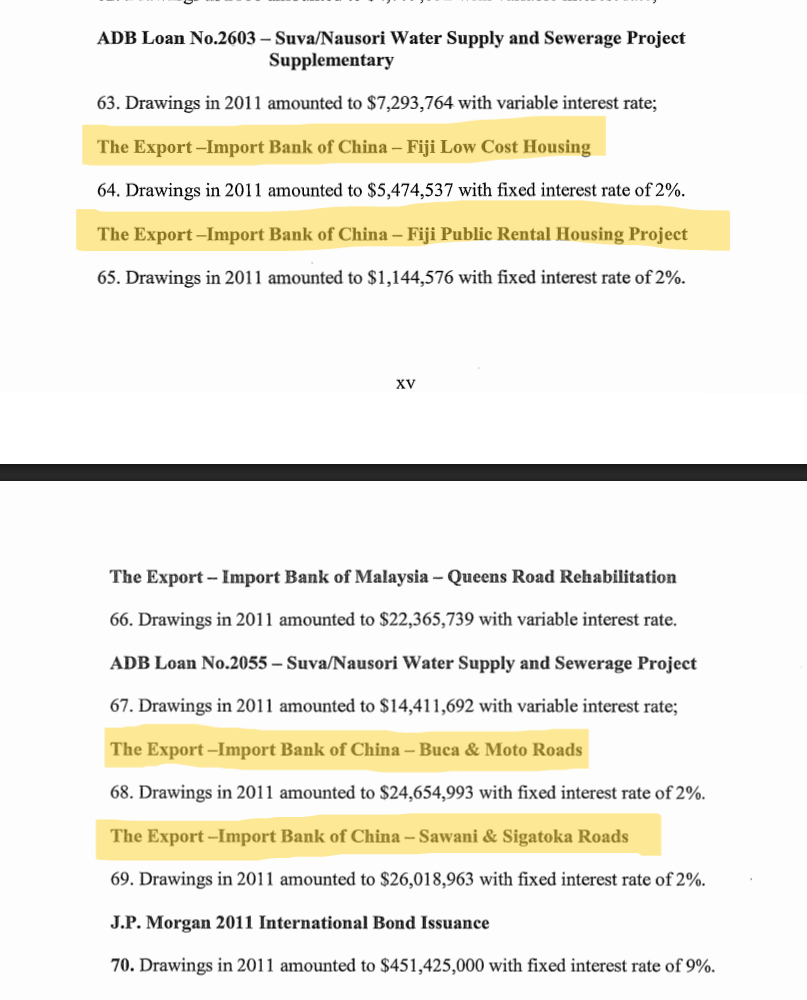

## I want code to pull this data ^ for me!

This image comes from an annual report from Fiji's ministry of finance.

It may not look hard to just ctrl+f 'China' to see this, then write the observation down in an excel sheet, but we have like 10 people on the team, spending hundereds and hundreds of hours doing this, to hand populate dataframe. Surely there's a more programatic way of handling this. My thought is that an LLM would be the answer.

# How could an LLM help?

        If I was smarter, I would love to build an LMST tensorflow model that is trained on important words about loan level data, then I feed it the pdf strings. However, I'm not smart enough yet. Maybe a generalized AI model could achieve this, like ChatGPT. My colleugues already use ChatGPT to read these pdfs, through the usual prompting process. However, this already has a scaling problem. For example, in researching Indonesia, I went through 100 different sources to make a dataframe of over 200 observations of loan level data. One time, I spent 30 hours reading through Libyan reports, to find NOTHING. 

        Even using ChatGPT to make individual prompting was slow. Then, I learned something cool, you can use API code to prompt ChatGPT, so I could automate prompts to the AI. 

## Normal Prompting

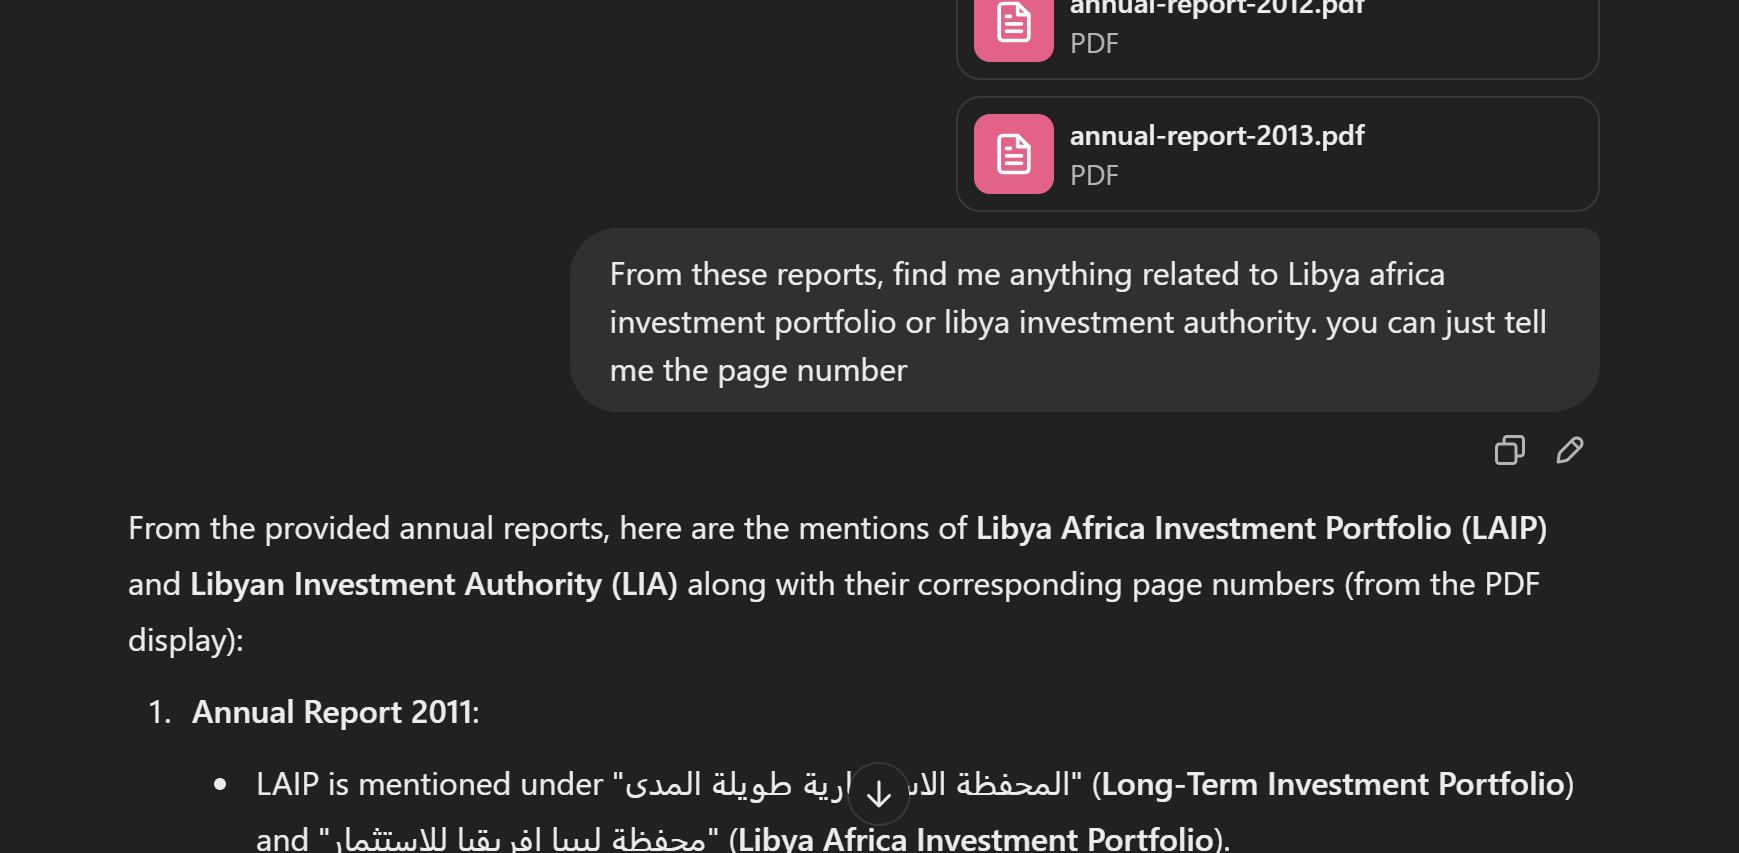

        Notice what I had to do? I had to make a specific prompt talking about the companies that contracted the Chinese Loan, and it took some more prompting with even more context to get what I wanted (the whole document was in Arabic, not fun to ctrl+f for). AidData already has a databse that would make for a great ChatGPT prompt to automatically do that prompt for me. Using a database to make context in an AI prompt would be a better way of scaling prompts. 

# Example of using code to scale prompting to an AI



    def check_loan_data(
        record_id, aiddata_id, source_id, observed_amount, observed_currency, observed_date, 
        commitment_amount, commitment_currency, nominal_usd, commitment_date, num_syndicate_members, 
        source_url, loan_description
    ):
    """
    Uses OpenAI to check the quality of loan data by identifying common errors made by data collectors.
    
    """

    prompt = f"""
    **You are an AI assistant specializing in financial data validation for a research lab analyzing official Chinese loans to developing countries.**
    
    Your task is to **check the correctness** of data entries related to loan commitments and disbursements.
    The user has provided loan records that need to be checked for accuracy. **Two main errors to check for:**
    
    **1. Misinterpretation of Commitment vs. Amount Outstanding:**
       - The data collector often **mistakenly inputted the commitment amount** instead of the amount outstanding.
       - If the description of the loan in the provided source suggests it refers to the total commitment (not yet disbursed), the observed amount should be flagged as incorrect.

    **2. Incorrect Allocation of Syndicated Loan Amounts:**
       - If a syndicated loan has multiple members and the **Chinese bank's contribution is unknown**, assume an **equal split** of all members.
       - If the observed amount does **not reflect this assumption**, flag it as incorrect.
    
    ---
    
    **Loan Record for Verification:**
    
    - **Unique Record ID (Indira's dataset):** {record_id}
    - **AidData Record ID:** {aiddata_id}
    - **Source ID:** {source_id}
    - **Observed Amount:** {observed_amount} {observed_currency}
    - **Observed Date:** {observed_date}
    - **Commitment Amount:** {commitment_amount} {commitment_currency}
    - **Nominal USD Amount:** {nominal_usd} USD
    - **Date of Commitment:** {commitment_date}
    - **Number of Members in Syndicated Loan Facility:** {num_syndicate_members}
    - **Source URL:** {source_url}
    
    **Description of Loan Agreement (1000 characters of context):** 
    {loan_description}
    
    ---
    
    **Instructions for Verification:**
    - **Step 1:** Analyze the description and determine if the "Observed Amount" likely represents **Commitment Amount** instead of **Amount Outstanding**.
    - **Step 2:** If this loan is **syndicated**, check if the Chinese bank’s contribution is **unknown**. If it is, assume an **equal split** among all members.
    - **Step 3:** Compare the **Observed Amount** with the expected values. If incorrect, explain **why it is suspicious**.
    
    **Return a JSON response with the following format:**
    
    ```json
    {{
      "Unique Record ID": "{record_id}",
      "AidData Record ID": "{aiddata_id}",
      "Source ID": "{source_id}",
      "Observed Amount": "{observed_amount} {observed_currency}",
      "Observed Date": "{observed_date}",
      "Commitment Amount": "{commitment_amount} {commitment_currency}",
      "Nominal USD Amount": "{nominal_usd} USD",
      "Date of Commitment": "{commitment_date}",
      "Number of Syndicated Loan Members": "{num_syndicate_members}",
      "AI Analysis": {{
        "Error Type": "Incorrect Commitment/Outstanding Amount" or "Incorrect Syndicated Loan Allocation" or "No Issues Detected",
        "Explanation": "Explain why this is incorrect or suspicious, referencing the loan description or expected calculations.",
        "Suggested Correction": "Provide a corrected value if possible."
      }}
    }}
    ```
    
    **Only return JSON output. If no errors are found, state that no issues were detected.**
    """

    # Call OpenAI API with this prompt
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[{"role": "system", "content": "You are a financial data validation assistant."},
                  {"role": "user", "content": prompt}],
        max_tokens=1000,
        temperature=0.2  # Lower temperature for more deterministic answers
    )

    extracted_text = response["choices"][0]["message"]["content"].strip()
    
    # Ensure valid JSON output
    try:
        extracted_data = json.loads(extracted_text)
    except json.JSONDecodeError:
        extracted_data = {
            "error": "Invalid JSON response",
            "raw_text": extracted_text
        }  # Store raw response for debugging

    return extracted_data

### Apply function to each row
    def run_qa_check(row):
        return check_loan_data(
            record_id=row["ddc_id"],
            aiddata_id=row["AidData Record ID"],
            source_id=row["Source ID"],
            observed_amount=row["Observed Amount"],
            observed_currency=row["Observed Amount Currency"],
            observed_date=row["Date"],
            commitment_amount=row["Amount (Original Currency)"],
            commitment_currency=row["Original Currency"],
            nominal_usd=row["Amount (Nominal USD)"],
            commitment_date=row["Commitment Date (MM/DD/YYYY)"],
            num_syndicate_members=row["Co-financing Count"],
            source_url=row["URL"],
            loan_description=row["Description"]
        )

df["AI QA Check"] = df.apply(run_qa_check, axis=1)


## Takeaways of this code
- Did you notice you can tell the AI to output a json to put the data in for you?
- You can set up the prompt to iterrate over your pandas dataframe: *Observed Amount": "{observed_amount} {observed_currency}",*
- You can make a template prompt and use code to plug in where things change. "Hey AI, can you check if [data] is in this source: [source]"

# Where I am struggling: Sources and Tokens

I know the sources that have loan level data (amounts outstanding, disbursements, payments), I have all the context dataframe set up, but I worry about getting the AI to read the source. If we use the OpenAI method, tokens acutally cost a little money (which would be charged to William and Mary, so not out of our own pockets). So, I wanted to optimize my prompts as much as possible.

Do we use a pdf reader or web scraper (both of which I have already code for), then use regex, then feed that into the AI? Do we just link the URL to the source in the prompt? Any other ideas?

# Why would this project apply to Big Data?
- I already have done **web scraping** code that grabs source info (even tho I would prefer pdf stuff)
- **Regex**, pulling paragraphs that mention 'China' or project name
- **MrJob**: read pdfs/webscraped stuff into rows of data
- **API**: If we use Open AI LLM, its an API call
- This is all about **scaling** individual AI prompts to something much more expansive, the 'Big' in 'Big Data'

# Code stuff

## AidData context data, what we would feed into LLM

In [160]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import calendar
from dateutil import parser
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import time
import re
from dateutil import parser
import PyPDF2
import os
from tqdm import tqdm
from PyPDF2 import PdfReader

In [113]:
internal_df_verbose = pd.read_excel('https://wkolichney.github.io/Data/aiddata_fiji_gcdf_loan.xlsx', sheet_name = 'loan')
columns_keep = ['AidData Record ID','Commitment Date (MM/DD/YYYY)', 'Amount (Original Currency)', 'Original Currency', 'Amount (Nominal USD)',
                'Co-financed', 'Co-financing Agencies', 'Title', 'Description']
internal_df = internal_df_verbose[columns_keep]
internal_df['Co-financing Count'] = internal_df['Co-financing Agencies'].apply(lambda x:len(str(x).split('|')) if pd.notna(x) else 0)


C:\Users\wikku\AppData\Local\Temp\ipykernel_55684\1404301895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_df['Co-financing Count'] = internal_df['Co-financing Agencies'].apply(lambda x:len(str(x).split('|')) if pd.notna(x) else 0)


In [125]:
##############   Look at AidData Data      ################
internal_df

,AidData Record ID,Commitment Date (MM/DD/YYYY),Amount (Original Currency),Original Currency,Amount (Nominal USD),Co-financed,Co-financing Agencies,Title,Description,Co-financing Count
0,95363,2021-05-13,NaN,NaN,NaN,No,NaN,China Eximbank suspends debt service payments ...,In response to the COVID-19 pandemic and the G...,0
1,95365,2020-09-23,NaN,NaN,NaN,No,NaN,China Eximbank suspends debt service payments ...,In response to the COVID-19 pandemic and the G...,0
2,64738,2012-09-21,642417124.0,CNY,1.018315e+08,No,NaN,China Eximbank provides RMB 642.4 million gove...,"On September 21, 2012, China Eximbank and the ...",0
3,40003,2010-12-28,325989122.0,CNY,4.815848e+07,No,NaN,China Eximbank RMB 325.9 million government co...,"On December 28, 2010, China Eximbank and the G...",0
4,49134,2010-12-28,365990000.0,CNY,5.406783e+07,No,NaN,China Eximbank provides RMB 365.9 million gove...,"On December 28, 2010, China Eximbank and the G...",0
5,62719,2010-07-28,36000000.0,CNY,5.318292e+06,No,NaN,China Eximbank provides RMB 36 million governm...,"On October 21, 2008, the Fijian Government app...",0
6,62721,2010-07-28,134339034.0,CNY,1.984595e+07,No,NaN,China Eximbank provides RMB 134 million govern...,"On October 21, 2008, the Fijian Government app...",0
7,68572,2010-12-28,NaN,NaN,NaN,No,NaN,Chinese Government provides preferential loans...,"On 22 December 2010, Fiji's Prime Minster host...",0
8,41923,2009-01-19,70000000.0,USD,7.000000e+07,Yes,ANZ Bank,China Development Bank provides $70 million lo...,"On January 19, 2009, China Development Bank an...",1
9,41935,2008-03-08,63600000.0,FJD,3.992314e+07,No,NaN,Chinese Government pledges loan for Ethanol Pr...,"In September 2008, Chinese investors announced...",0


## WebScrape Code and Regex "Window"
### This was for a Cuban loan

In [172]:
# Setup the driver
serv_obj = Service('C:/chromedriver-win64/chromedriver.exe')
driver = webdriver.Chrome(service=serv_obj)

# Initialize parameters
url_id = {'2016Report': '3464080',
          '2017Report': '4161136',
          '2018Report': '5144886',
          '2019Report': '6061292',
          '2020Report': '7001639',
          '2021Report': '8175081',
          '2022Report': '9068810',
          '2023Report': '9927903'}

string_dump= []
for i, j in url_id.items():
    # Construct URL with page parameter
    url_to_scrape = f"https://vip.stock.finance.sina.com.cn/corp/view/vCB_AllBulletinDetail.php?stockid=000065&id={j}"
    
    print(f"Navigating to page {i}...")
    driver.get(url_to_scrape)
    
    # Force a wait to let everything load
    print(f"Waiting for page {i} to fully load...")
    time.sleep(5)
    
    try:
        # Find listing elements with the correct XPath
        page_text = [element.text for element in driver.find_elements(By.XPATH, '//*[@id="content"]')]

        string_dump.append({"Report Year": i, "Text" : page_text if page_text else 'Nah'})
        
 
    except Exception as e:
        print(f"Error finding listings on page {j}: {e}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(string_dump)
# Display a summary of the data
print("\nData Summary:")
print(f"Total listings collected: {len(df)}")
print(df.info())

def extract_context(text, keyword="古巴", window=500):
    if isinstance(text, list):  # If text is stored as a list
        text = " ".join(text)  # Flatten the list into a string

    matches = [m.start() for m in re.finditer(keyword, text)]  # Find positions of "古巴"

    contexts = []
    for pos in matches:
        start = max(pos - window, 0)  # Prevent out-of-bounds indexing
        end = min(pos + len(keyword) + window, len(text))  # Prevent exceeding text length
        contexts.append(text[start:end])  # Extract surrounding text

    return contexts if contexts else None  # Return extracted text or None if no match

df["Cuba Context"] = df["Text"].apply(lambda x: extract_context(x, window=500))

Navigating to page 2016Report...
Waiting for page 2016Report to fully load...
Navigating to page 2017Report...
Waiting for page 2017Report to fully load...
Navigating to page 2018Report...
Waiting for page 2018Report to fully load...
Navigating to page 2019Report...
Waiting for page 2019Report to fully load...
Navigating to page 2020Report...
Waiting for page 2020Report to fully load...
Navigating to page 2021Report...
Waiting for page 2021Report to fully load...
Navigating to page 2022Report...
Waiting for page 2022Report to fully load...
Navigating to page 2023Report...
Waiting for page 2023Report to fully load...

Data Summary:
Total listings collected: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Report Year  8 non-null      object
 1   Text         8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes
None


## PDF reading
### This is a Fiji source

In [162]:
# Step 1: Download the PDF into your working directory
def download_pdf(url, save_path):
    try:
        response = requests.get(url)
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded and saved: {save_path}")
    except Exception as e:
        print(f"Failed to download {url}: {str(e)}")

# Step 2: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    try:
        with open(pdf_path, 'rb') as file:
            pdf_reader = PdfReader(file)
            text = [page.extract_text() for page in pdf_reader.pages if page.extract_text()]
            return '\n'.join(text)
    except Exception as e:
        print(f"Error processing {pdf_path}: {str(e)}")
        return None

# Step 3: Process a list of PDF files and return a DataFrame
def process_pdfs(pdf_directory, pdf_filenames):
    results = []

    for pdf_file in tqdm(pdf_filenames, desc="Processing PDFs"):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        source_id = pdf_file.replace('.pdf', '')

        text = extract_text_from_pdf(pdf_path)

        if text:
            results.append({
                'source_id': source_id,
                'text': text,
                'file_size': os.path.getsize(pdf_path),
                'num_pages': len(PdfReader(pdf_path).pages)
            })

    return pd.DataFrame(results)

# === USAGE ===

# Define URL and local file name
url = "https://wkolichney.github.io/Data/2014_budget_estimate.pdf"
pdf_filename = "2014_budget_estimate.pdf"
working_directory = "."  # current folder

# Download
download_pdf(url, os.path.join(working_directory, pdf_filename))

# Process
df = process_pdfs(working_directory, [pdf_filename])
df.head()

Downloaded and saved: .\2014_budget_estimate.pdf


Processing PDFs: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:59<00:00, 59.26s/it]


,source_id,text,file_size,num_pages
0,2014_budget_estimate,\nFIJI\n BUDGET ESTIMA...,15946031,379


In [170]:
#If you don't believe it worked, uncomment the next lines of code. It read in a full pdf

#with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    #print(df[['text']])

# Code Takeaway
- I have shown you all the ways to collect context that then could be given to an AI prompt to find relevant loan level data given source information

# Conclusion

        Manually collecting data through PDFs and slapping them onto an excel sheet is a waste of human ingenuity. What I want my organization to focus on is the data analysis, interpretations, and insights. We already have the pieces that would help us automate the data collection. I would love help figuring out how to get to the finish line. Do we do the OpenAI API prompt? Do we download an open source AI model onto our own machines, and run the automated prompts through there? Do we make our own tensor flow LMST model?
        
        When selecting a project, one of the most important questions is: Is it easy to do? After all, this is a class grade. Well, I ask you, what's the hardest part of these projects, like the ML 1 project? For many teams, they complained that base data they were working with was bad or hard to clean. Save for the Pdfs and webscraping, I have already cleaned the data for you. I already know what loan level data is in the sources we are going to look at. Basically, I have served the start line on a silver platter, and I know what the finish line looks like. I just want to see if we can get AI to run the race for us.
        
        I hope y'all would be excited about this project. I didn't realize what it meant to really use AI until I tried to think about using OpenAI's API call to automate prompting. Not only did it make me understand AI capabliites, but I also see how close our abilites are to really doing something cool. Not only is this project itself important to the finance industry (JP Morgan), important to 'US national security', but the skills that this project will develop in us will make us cutting edge data/business analysts (see the earlier job description).
        